In [30]:
import pandas as pd

In [31]:
cols = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'CG', 'CL', 'HPW', 'Country', 'Salary']

In [32]:
salary_data = pd.read_csv('/Users/topih/Pytorch/datasets/adult_salary.csv', names = cols)

In [33]:
salary_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,CG,CL,HPW,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
unwanted_columns = ['fnlwgt', 'Education', 'Relationship', 'CG', 'CL', 'Country']

In [36]:
salary_data = salary_data.drop(unwanted_columns, axis=1)

In [37]:
salary_data.head()

,Age,Workclass,Education-num,Marital-status,Occupation,Race,Sex,HPW,Salary
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K


In [38]:
import numpy as np

In [39]:
salary_data = salary_data.replace(' ?', np.nan)

In [40]:
len(salary_data)

32561

In [41]:
salary_data = salary_data.dropna()

In [42]:
len(salary_data)

30718

In [43]:
salary_features = salary_data.drop('Salary', axis=1)

In [45]:
salary_features.columns

Index(['Age', 'Workclass', 'Education-num', 'Marital-status', 'Occupation',
       'Race', 'Sex', 'HPW'],
      dtype='object')

In [46]:
salary_features['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [48]:
salary_features[['Sex']] = salary_features[['Sex']].apply(le.fit_transform)

In [49]:
salary_features.head()

,Age,Workclass,Education-num,Marital-status,Occupation,Race,Sex,HPW
0,39,State-gov,13,Never-married,Adm-clerical,White,1,40
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,1,13
2,38,Private,9,Divorced,Handlers-cleaners,White,1,40
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,1,40
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,0,40


In [50]:
ohe_cols = ['Workclass', 'Marital-status', 'Occupation', 'Race']

In [51]:
salary_features = pd.get_dummies(salary_features, columns = ohe_cols)

In [52]:
salary_features.columns

Index(['Age', 'Education-num', 'Sex', 'HPW', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Private', 'Workclass_ Self-emp-inc',
       'Workclass_ Self-emp-not-inc', 'Workclass_ State-gov',
       'Workclass_ Without-pay', 'Marital-status_ Divorced',
       'Marital-status_ Married-AF-spouse',
       'Marital-status_ Married-civ-spouse',
       'Marital-status_ Married-spouse-absent',
       'Marital-status_ Never-married', 'Marital-status_ Separated',
       'Marital-status_ Widowed', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Occupation_ Tech-support',
       'Occupation_ Transport-moving', 'Race_ Amer-Indian-Eski

In [53]:
scalable_cols = ['Age', 'Education-num', 'HPW']

In [55]:
salary_features[scalable_cols] = preprocessing.scale(salary_features[scalable_cols])

C:\Users\topih\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [56]:
salary_features.head()

,Age,Education-num,Sex,HPW,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,...,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,0.042416,1.119909,1,-0.079207,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.880958,1.119909,1,-2.331988,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033815,-0.441111,1,-0.079207,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.109651,-1.221621,1,-0.079207,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.796125,1.119909,0,-0.079207,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [57]:
salary_target = salary_data[['Salary']]

In [83]:
salary_target = salary_target.apply(le.fit_transform)

In [59]:
salary_target['Salary'].unique()

array([0, 1], dtype=int64)

In [60]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(salary_features,
                                                   salary_target,
                                                   test_size=0.2,
                                                   random_state=0)

In [61]:
X_train.shape, Y_train.shape

((24574, 37), (24574, 1))

In [63]:
import torch

In [97]:
Xtrain_ = torch.from_numpy(X_train.values).float()
Xtest_ = torch.from_numpy(x_test.values).float()

In [98]:
Xtrain_.shape

torch.Size([24574, 37])

In [99]:
Ytrain_ = torch.from_numpy(Y_train.values).view(1,-1)[0]
Ytest_ = torch.from_numpy(y_test.values).view(1,-1)[0]

In [100]:
Ytrain_.shape, Ytrain_.type, Ytest_.type

(torch.Size([24574]), <function Tensor.type>, <function Tensor.type>)

In [101]:
import torch.nn as nn
import torch.nn.functional as F

In [102]:
input_size = 37
output_size = 2
hidden_size = 10

In [103]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=-1)

In [104]:
model = Net()

In [105]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())

loss_fn = nn.NLLLoss()

In [110]:
epoch_data = []
epochs = 1000

for epoch in range(1, epochs+1):
    
    optimizer.zero_grad()
    Ypred = model(Xtrain_)
    
    loss = loss_fn(Ypred, Ytrain_.long())
    loss.backward()
    
    optimizer.step()
    
    Ypred_test = model(Xtest_)
    loss_test = loss_fn(Ypred_test, Ytest_.long())
    
    _,pred = Ypred_test.data.max(1)
    
    accuracy = pred.eq(Ytest_.data.long()).sum().item() / y_test.values.size
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
    
    if epoch % 100 == 0:
        
        print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f'\
             % (epoch, epoch/100*10, loss.data.item(), loss_test.data.item(), accuracy))

epoch - 100 (10%) train loss - 0.48 test loss - 0.48 accuracy - 0.7619
epoch - 200 (20%) train loss - 0.38 test loss - 0.38 accuracy - 0.8231
epoch - 300 (30%) train loss - 0.36 test loss - 0.36 accuracy - 0.8304
epoch - 400 (40%) train loss - 0.35 test loss - 0.36 accuracy - 0.8350
epoch - 500 (50%) train loss - 0.35 test loss - 0.35 accuracy - 0.8379
epoch - 600 (60%) train loss - 0.35 test loss - 0.35 accuracy - 0.8384
epoch - 700 (70%) train loss - 0.35 test loss - 0.35 accuracy - 0.8376
epoch - 800 (80%) train loss - 0.35 test loss - 0.35 accuracy - 0.8372
epoch - 900 (90%) train loss - 0.35 test loss - 0.35 accuracy - 0.8369
epoch - 1000 (100%) train loss - 0.35 test loss - 0.35 accuracy - 0.8392


In [111]:
df_epochs_data = pd.DataFrame(epoch_data,
                             columns=['epoch', 'train_loss', 'test_loss', 'accuracy'])

In [112]:
import matplotlib.pyplot as plt

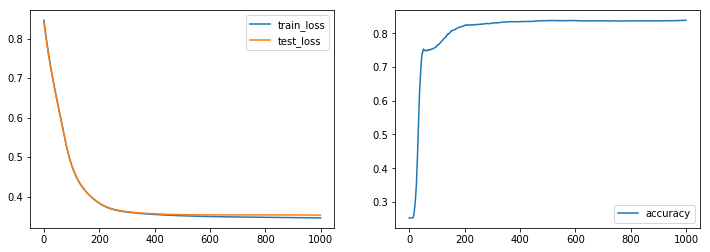

In [113]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
df_epochs_data[['train_loss', 'test_loss']].plot(ax=ax1)
df_epochs_data[['accuracy']].plot(ax=ax2)
plt.show()